In [50]:
import numpy as np

import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model

import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sb

In [25]:
data=pd.read_csv('RefBldgHospitalNew2004_v1.3_7.1_1A_USA_FL_MIAMI.csv')

In [26]:
data

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,971.952876,97.414711,581.117713,0.0,34.961655,113.312780,437.871432,423.523230,5.664670,8.683532
1,01/01 02:00:00,978.967624,97.414711,588.635754,0.0,34.961655,113.312780,448.442027,434.094461,5.664670,8.682896
2,01/01 03:00:00,979.258020,97.414711,588.981806,0.0,34.961655,113.312780,455.822683,441.473739,5.664670,8.684275
3,01/01 04:00:00,979.155891,97.414711,588.900513,0.0,34.961655,113.312780,462.432600,448.084394,5.664670,8.683536
4,01/01 05:00:00,988.149834,97.414711,587.545444,0.0,44.493766,113.312780,455.805651,441.458136,5.664670,8.682845
...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,1004.735248,97.414711,559.001182,0.0,44.493766,155.957040,414.421686,346.435319,56.646700,11.339667
8756,12/31 21:00:00,976.380663,97.414711,562.371025,0.0,44.493766,124.558693,452.824893,381.489205,56.646700,14.688988
8757,12/31 22:00:00,975.484609,97.414711,561.859894,0.0,44.493766,124.558693,439.378341,388.210466,42.485025,8.682851
8758,12/31 23:00:00,964.460726,97.414711,560.941145,0.0,34.961655,124.558693,441.468500,404.460959,28.323350,8.684191


In [5]:
sum(data.iloc[:,4]!=0)

0

In [27]:
data=data.drop(['Heating:Electricity [kW](Hourly)'],axis=1)

In [28]:
data.shape

(8760, 10)

In [29]:
data.apply(lambda x:sum(pd.isna(x)))

Date/Time                                     0
Electricity:Facility [kW](Hourly)             0
Fans:Electricity [kW](Hourly)                 0
Cooling:Electricity [kW](Hourly)              0
InteriorLights:Electricity [kW](Hourly)       0
InteriorEquipment:Electricity [kW](Hourly)    0
Gas:Facility [kW](Hourly)                     0
Heating:Gas [kW](Hourly)                      0
InteriorEquipment:Gas [kW](Hourly)            0
Water Heater:WaterSystems:Gas [kW](Hourly)    0
dtype: int64

In [11]:
data.isna()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False


In [30]:
data.isna().any()

Date/Time                                     False
Electricity:Facility [kW](Hourly)             False
Fans:Electricity [kW](Hourly)                 False
Cooling:Electricity [kW](Hourly)              False
InteriorLights:Electricity [kW](Hourly)       False
InteriorEquipment:Electricity [kW](Hourly)    False
Gas:Facility [kW](Hourly)                     False
Heating:Gas [kW](Hourly)                      False
InteriorEquipment:Gas [kW](Hourly)            False
Water Heater:WaterSystems:Gas [kW](Hourly)    False
dtype: bool

In [31]:
data.iloc[:,0]

0        01/01  01:00:00
1        01/01  02:00:00
2        01/01  03:00:00
3        01/01  04:00:00
4        01/01  05:00:00
              ...       
8755     12/31  20:00:00
8756     12/31  21:00:00
8757     12/31  22:00:00
8758     12/31  23:00:00
8759     12/31  24:00:00
Name: Date/Time, Length: 8760, dtype: object

<AxesSubplot:>

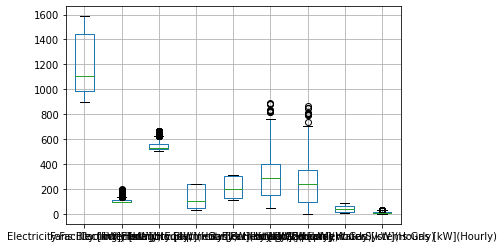

In [32]:
data.drop(['Date/Time'], axis=1).boxplot()

In [33]:
data.iloc[:,7]

0       423.523230
1       434.094461
2       441.473739
3       448.084394
4       441.458136
           ...    
8755    346.435319
8756    381.489205
8757    388.210466
8758    404.460959
8759    412.842488
Name: Heating:Gas [kW](Hourly), Length: 8760, dtype: float64

In [34]:
Q1 = data.iloc[:,7].quantile(0.25)
Q3 = data.iloc[:,7].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter1 = (data.iloc[:,7]<= Q1 - 1.5 * IQR) | (data.iloc[:,7] >= Q3 + 1.5 *IQR)
np.arange(8760)[filter1]  

array([  29,  197,  389,  533,  869, 1229, 1876, 7589, 7925, 8429])

In [35]:
Q1 = data.iloc[:,8].quantile(0.25)
Q3 = data.iloc[:,8].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter2= (data.iloc[:,8]<= Q1 - 1.5 * IQR) | (data.iloc[:,8] >= Q3 + 1.5 *IQR)
np.arange(8760)[filter2]

array([], dtype=int64)

In [36]:
data.iloc[0]  

Date/Time                                      01/01  01:00:00
Electricity:Facility [kW](Hourly)                   971.952876
Fans:Electricity [kW](Hourly)                        97.414711
Cooling:Electricity [kW](Hourly)                    581.117713
InteriorLights:Electricity [kW](Hourly)              34.961655
InteriorEquipment:Electricity [kW](Hourly)           113.31278
Gas:Facility [kW](Hourly)                           437.871432
Heating:Gas [kW](Hourly)                             423.52323
InteriorEquipment:Gas [kW](Hourly)                     5.66467
Water Heater:WaterSystems:Gas [kW](Hourly)            8.683532
Name: 0, dtype: object

In [37]:
Q1 = data.iloc[:,6].quantile(0.25)
Q3 = data.iloc[:,6].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter3= (data.iloc[:,6]<= Q1 - 1.5 * IQR) | (data.iloc[:,6] >= Q3 + 1.5 *IQR)
np.arange(8760)[filter3]   # indices1 in R scripts --1

array([  29,  197,  389,  533,  869, 1876, 7589, 7925, 8429])

In [38]:
data=data.drop(np.arange(8760)[filter3])

In [39]:
np.arange(8760)

array([   0,    1,    2, ..., 8757, 8758, 8759])

In [40]:
data   #8751 rows × 10 columns

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,971.952876,97.414711,581.117713,34.961655,113.312780,437.871432,423.523230,5.664670,8.683532
1,01/01 02:00:00,978.967624,97.414711,588.635754,34.961655,113.312780,448.442027,434.094461,5.664670,8.682896
2,01/01 03:00:00,979.258020,97.414711,588.981806,34.961655,113.312780,455.822683,441.473739,5.664670,8.684275
3,01/01 04:00:00,979.155891,97.414711,588.900513,34.961655,113.312780,462.432600,448.084394,5.664670,8.683536
4,01/01 05:00:00,988.149834,97.414711,587.545444,44.493766,113.312780,455.805651,441.458136,5.664670,8.682845
...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,1004.735248,97.414711,559.001182,44.493766,155.957040,414.421686,346.435319,56.646700,11.339667
8756,12/31 21:00:00,976.380663,97.414711,562.371025,44.493766,124.558693,452.824893,381.489205,56.646700,14.688988
8757,12/31 22:00:00,975.484609,97.414711,561.859894,44.493766,124.558693,439.378341,388.210466,42.485025,8.682851
8758,12/31 23:00:00,964.460726,97.414711,560.941145,34.961655,124.558693,441.468500,404.460959,28.323350,8.684191


In [41]:
pair_cor=data.corr()
pair_cor

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
Electricity:Facility [kW](Hourly),1.000000,0.712774,-0.044778,0.969801,0.947682,-0.081276,-0.229002,0.628958,0.738054
Fans:Electricity [kW](Hourly),0.712774,1.000000,-0.300872,0.670244,0.651155,-0.483325,-0.548233,0.379997,0.438311
Cooling:Electricity [kW](Hourly),-0.044778,-0.300872,1.000000,-0.177867,-0.180893,0.701499,0.693474,-0.151003,-0.056664
InteriorLights:Electricity [kW](Hourly),0.969801,0.670244,-0.177867,1.000000,0.920647,-0.134719,-0.271765,0.600718,0.686434
InteriorEquipment:Electricity [kW](Hourly),0.947682,0.651155,-0.180893,0.920647,1.000000,-0.124486,-0.275158,0.661824,0.722476
Gas:Facility [kW](Hourly),-0.081276,-0.483325,0.701499,-0.134719,-0.124486,1.000000,0.977389,-0.180274,0.016111
Heating:Gas [kW](Hourly),-0.229002,-0.548233,0.693474,-0.271765,-0.275158,0.977389,1.000000,-0.380171,-0.127539
InteriorEquipment:Gas [kW](Hourly),0.628958,0.379997,-0.151003,0.600718,0.661824,-0.180274,-0.380171,1.000000,0.509403
Water Heater:WaterSystems:Gas [kW](Hourly),0.738054,0.438311,-0.056664,0.686434,0.722476,0.016111,-0.127539,0.509403,1.000000


<AxesSubplot:>

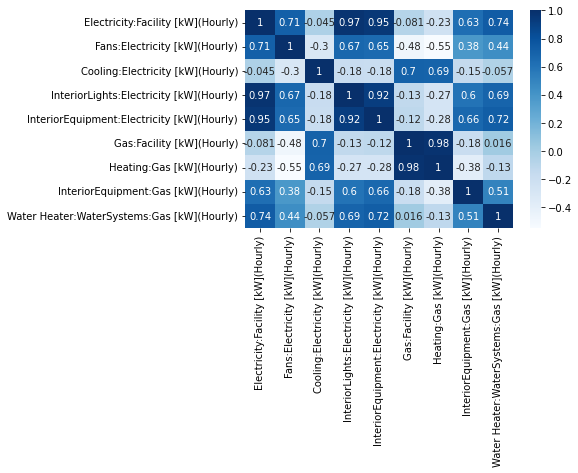

In [51]:
sb.heatmap(pair_cor, cmap="Blues", annot=True)

In [42]:
pair_cor.apply(lambda x: np.mean(x))

Electricity:Facility [kW](Hourly)             0.515802
Fans:Electricity [kW](Hourly)                 0.280006
Cooling:Electricity [kW](Hourly)              0.164766
InteriorLights:Electricity [kW](Hourly)       0.473722
InteriorEquipment:Electricity [kW](Hourly)    0.480361
Gas:Facility [kW](Hourly)                     0.187880
Heating:Gas [kW](Hourly)                      0.093222
InteriorEquipment:Gas [kW](Hourly)            0.341050
Water Heater:WaterSystems:Gas [kW](Hourly)    0.436287
dtype: float64

In [43]:
data['Electricity:Facility [kW](Hourly)']

0        971.952876
1        978.967624
2        979.258020
3        979.155891
4        988.149834
           ...     
8755    1004.735248
8756     976.380663
8757     975.484609
8758     964.460726
8759     972.302671
Name: Electricity:Facility [kW](Hourly), Length: 8751, dtype: float64

In [44]:
full_m= linear_model.LinearRegression()
X_train=data.drop(['Date/Time','Electricity:Facility [kW](Hourly)'], axis=1)
Y_train=data['Electricity:Facility [kW](Hourly)']

In [46]:
Y_train 

0        971.952876
1        978.967624
2        979.258020
3        979.155891
4        988.149834
           ...     
8755    1004.735248
8756     976.380663
8757     975.484609
8758     964.460726
8759     972.302671
Name: Electricity:Facility [kW](Hourly), Length: 8751, dtype: float64

In [173]:
X_train

,Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,97.414711,581.117713,34.961655,113.312780,437.871432,423.523230,5.664670,8.683532
1,97.414711,588.635754,34.961655,113.312780,448.442027,434.094461,5.664670,8.682896
2,97.414711,588.981806,34.961655,113.312780,455.822683,441.473739,5.664670,8.684275
3,97.414711,588.900513,34.961655,113.312780,462.432600,448.084394,5.664670,8.683536
4,97.414711,587.545444,44.493766,113.312780,455.805651,441.458136,5.664670,8.682845
...,...,...,...,...,...,...,...,...
8755,97.414711,559.001182,44.493766,155.957040,414.421686,346.435319,56.646700,11.339667
8756,97.414711,562.371025,44.493766,124.558693,452.824893,381.489205,56.646700,14.688988
8757,97.414711,561.859894,44.493766,124.558693,439.378341,388.210466,42.485025,8.682851
8758,97.414711,560.941145,34.961655,124.558693,441.468500,404.460959,28.323350,8.684191


In [47]:
full_m.fit(X_train, Y_train)
full_m.coef_

array([ 1.36801895e+00,  9.59996010e-01,  1.48880791e+00,  7.55653554e-01,
       -4.26977033e+08,  4.26977033e+08,  4.26977034e+08,  4.26977036e+08])

In [179]:
X_train.columns

Index(['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')

In [183]:
X_train1=X_train.assign(const = np.ones(8751))

In [190]:
#deleting selecting predictors with highest vif
vif_data = pd.DataFrame()
vif_data["feature"] = X_train1.columns
vif_data["VIF"] = [variance_inflation_factor(X_train1.values, i) for i in range(len(X_train1.columns))]
vif_data 

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Fans:Electricity [kW](Hourly),2.837797
1,Cooling:Electricity [kW](Hourly),2.126855
2,InteriorLights:Electricity [kW](Hourly),7.084161
3,InteriorEquipment:Electricity [kW](Hourly),8.522548
4,Gas:Facility [kW](Hourly),inf
5,Heating:Gas [kW](Hourly),inf
6,InteriorEquipment:Gas [kW](Hourly),inf
7,Water Heater:WaterSystems:Gas [kW](Hourly),inf
8,const,364.061091


In [197]:
#deleting selecting predictors with highest vif 
X_train1_drop_H_G=X_train1.drop(['Heating:Gas [kW](Hourly)'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train1_drop_H_G.columns
vif_data["VIF"] = [variance_inflation_factor(X_train1_drop_H_G.values, i) for i in range(len(X_train1_drop_H_G.columns))]
vif_data 

,feature,VIF
0,Fans:Electricity [kW](Hourly),2.837778
1,Cooling:Electricity [kW](Hourly),2.126842
2,InteriorLights:Electricity [kW](Hourly),7.083149
3,InteriorEquipment:Electricity [kW](Hourly),8.521058
4,Gas:Facility [kW](Hourly),2.928144
5,InteriorEquipment:Gas [kW](Hourly),1.919198
6,Water Heater:WaterSystems:Gas [kW](Hourly),2.177069
7,const,364.058789


In [198]:
##deleting selecting predictors with highest vif
X_train2=X_train1_drop_H_G.drop(['InteriorEquipment:Electricity [kW](Hourly)'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train2.columns
vif_data["VIF"] = [variance_inflation_factor(X_train2.values, i) for i in range(len(X_train2.columns))]
vif_data 
#all vif<5

,feature,VIF
0,Fans:Electricity [kW](Hourly),2.718276
1,Cooling:Electricity [kW](Hourly),2.095974
2,InteriorLights:Electricity [kW](Hourly),3.463863
3,Gas:Facility [kW](Hourly),2.858943
4,InteriorEquipment:Gas [kW](Hourly),1.690730
5,Water Heater:WaterSystems:Gas [kW](Hourly),2.021936
6,const,354.114214


In [53]:
X_train_final=X_train.drop(['InteriorEquipment:Electricity [kW](Hourly)','Heating:Gas [kW](Hourly)'],axis=1)
X_train_final

,Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,97.414711,581.117713,34.961655,437.871432,5.664670,8.683532
1,97.414711,588.635754,34.961655,448.442027,5.664670,8.682896
2,97.414711,588.981806,34.961655,455.822683,5.664670,8.684275
3,97.414711,588.900513,34.961655,462.432600,5.664670,8.683536
4,97.414711,587.545444,44.493766,455.805651,5.664670,8.682845
...,...,...,...,...,...,...
8755,97.414711,559.001182,44.493766,414.421686,56.646700,11.339667
8756,97.414711,562.371025,44.493766,452.824893,56.646700,14.688988
8757,97.414711,561.859894,44.493766,439.378341,42.485025,8.682851
8758,97.414711,560.941145,34.961655,441.468500,28.323350,8.684191


In [57]:
#model building 
final_m= linear_model.LinearRegression()
final_m.fit(X_train_final, Y_train)

LinearRegression()

In [58]:
fitted=final_m.predict(X_train_final)
fitted

array([964.00257486, 970.70317583, 971.1529294 , ..., 988.37027713,
       960.31228488, 957.98893689])

In [63]:
fitted1=model.fittedvalues
fitted1

0        964.002575
1        970.703176
2        971.152929
3        971.211220
4        988.678511
           ...     
8755    1002.853126
8756    1017.753647
8757     988.370277
8758     960.312285
8759     957.988937
Length: 8751, dtype: float64

In [62]:
res=Y_train-fitted1
res

0        7.950301
1        8.264449
2        8.105090
3        7.944671
4       -0.528677
          ...    
8755     1.882122
8756   -41.372985
8757   -12.885668
8758     4.148441
8759    14.313734
Length: 8751, dtype: float64

In [54]:
#alternative way of model building 
X_train_final_cons=sm.add_constant(X_train_final)
model = sm.OLS(Y_train, X_train_final_cons).fit() 

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Electricity:Facility [kW](Hourly)   R-squared:                       0.983
Model:                                           OLS   Adj. R-squared:                  0.983
Method:                                Least Squares   F-statistic:                 8.631e+04
Date:                               Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                                       12:20:39   Log-Likelihood:                -41599.
No. Observations:                               8751   AIC:                         8.321e+04
Df Residuals:                                   8744   BIC:                         8.326e+04
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        188.3703      5.649     33.346      0.000     177.297     199.444
Fans:Electricity [kW](Hourly)                  1.6802      0.021     79.583      0.000       1.639       1.722
Cooling:Electricity [kW](Hourly)               0.8637      0.011     76.726      0.000       0.842       0.886
InteriorLights:Electricity [kW](Hourly)        1.9693      0.007    295.436      0.000       1.956       1.982
Gas:Facility [kW](Hourly)                      0.0198      0.004      5.393      0.000       0.013       0.027
InteriorEquipment:Gas [kW](Hourly)             0.6030      0.014     41.829      0.000       0.575       0.631
Water Heater:WaterSystems:Gas [kW](Hourly)     3.3526      0.060     55.619      0.000       3.234       3.471
==============================================================================
Omnibus:                      158.381   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.264
Skew:                           0.289   Prob(JB):                     1.18e-39
Kurtosis:                       3.396   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#Proceed to  detect outliers
influence = model.get_influence()
cooks = influence.cooks_distance
cook_dis=cooks[0]  #By default, the cooks_distance() function displays an array of values for Cook’s distance for each observation 
#followed by an array of corresponding p-values.
cook_dis[cook_dis>1]  #influcence
#none of the observations has cook_distance larger than 0.1, so there's no more outliers to delete

array([], dtype=float64)

In [71]:
leverage = influence.hat_matrix_diag #leverage 
standardized_residuals = influence.resid_studentized_internal 
studentized_residuals = influence.resid_studentized_external ##consistency
d=np.sqrt(np.var(studentized_residuals)) 
studentized_residuals[abs(studentized_residuals) >2*d][0:10] #lots of data points that are inconsistent 

array([ 2.25854635, -2.30950178, -2.10891642, -2.09971347, -2.13282038,
        2.55865453,  2.36839047, -2.71237151,  2.34974209, -2.04748018])

In [72]:
 leverage[leverage > 2*6/ 8751][0:10] #lots of data points has high leverage

array([0.00162039, 0.0014361 , 0.00155152, 0.00182235, 0.00168019,
       0.00163543, 0.00167775, 0.00147463, 0.0016383 , 0.00157323])

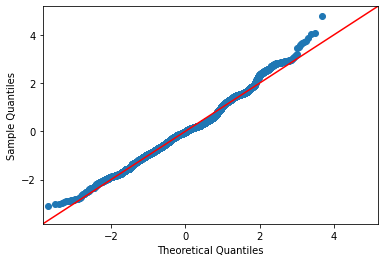

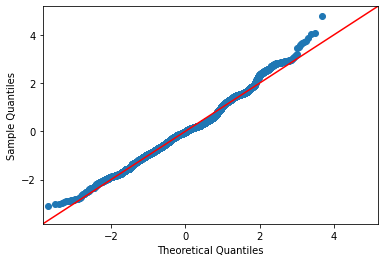

In [220]:
sm.qqplot(standardized_residuals, line ='45')  #we can see qqplot of standardized_residuals almost follows a straight line, 
#so normality holds

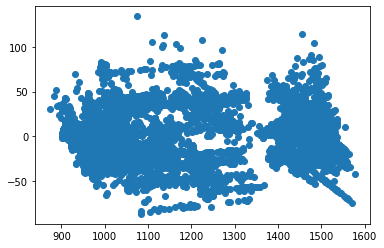

In [222]:
plt.scatter(fitted,res)

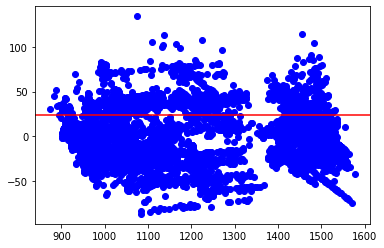

In [227]:
fig, ax = plt.subplots()
ax.scatter(fitted,res, c='blue')
line = mlines.Line2D([0, 1], [1/2, 1/2], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)  #use residual plot to check constant variance
# points are scattered evenly within a horizontal band around 0, so the variance is constant and linearity holds

In [64]:
X=sm.add_constant(np.log(fitted))
model1 = sm.OLS(np.log(abs(res)), X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     255.3
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.16e-56
Time:                        12:33:55   Log-Likelihood:                -13735.
No. Observations:                8751   AIC:                         2.747e+04
Df Residuals:                    8749   BIC:                         2.749e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2335      0.489    -10.693      0.000      -6.193      -4.274
x1             1.1069      0.069     15.978      0.000       0.971       1.243
==============================================================================
Omnibus:                     2053.270   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5866.595
Skew:                          -1.230   Prob(JB):                         0.00
Kurtosis:                       6.169   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-0.1069

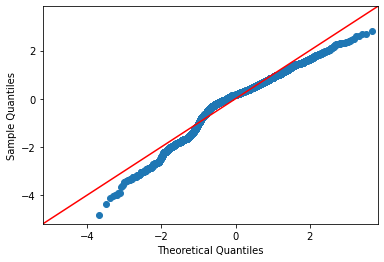

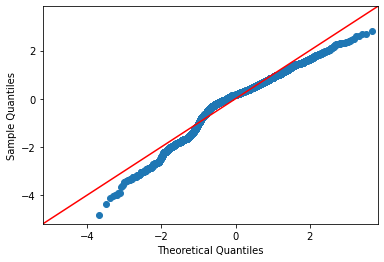